<a href="https://colab.research.google.com/github/ubsuny/PHY386/blob/Homework2025/2025/HW/codeBall01/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3: Sensor Data Analysis with phyphox and Python

## Measuring data with Smartphone Sensors  
Modern smartphones contain sophisticated sensor arrays capable of capturing high-quality physical measurements. This assignment integrates sensor data collection via the **phyphox** app with computational analysis using Python's `numpy`, `scipy`, and `pandas` libraries.

## Learning outcome
- read data in python using pandas
- quantify measurement uncertainty
- plot data
- validate theoretical models against experimental data


## Part 1: Experimental Setup with phyphox (10 points)
**Task: Data Acquisition**  
1. Design an experiment using your phone's **3-axis accelerometer** (e.g., free-fall, pendulum motion, or elevator acceleration).  
2. Configure phyphox to record data at ≥100 Hz sampling rate
3. Export 1-60 seconds of raw acceleration data (`acceleration.csv`) with timestamps.  





## Part 2: Data Analysis with pandas and NumPy (8 points)
**Task: Data Preprocessing**
- upload the csv to google colab
- read in csv file using `pandas`
- remove beginning and end of data where experiment didn't start yet / was already over (check part 3)


## Part 3: Model Fitting and Visualization (8 points)

**Task: Plot preprocessed data using pandas**
- plot time vs acceleration

**Task: Model fit**
- use `scipy.optimize.curve_fit` to fit a physics model to your data

Examples:

- **Gravitational Acceleration**  
Fit vertical acceleration to:  
$$
a(t) = g + \epsilon(t) \quad \text{(ε = measurement error)}
$$

    Report $\hat{g} \pm \delta g $

    add to plot above.


or

- **Damped Oscillation Model**  
For pendulum experiments, fit to:  
$$
a(t) = A e^{-\beta t} \cos(\omega t + \phi)
$$

    Calculate damping ratio $
    \beta$ and natural frequency $\omega $

    add to plot above.

or

 - **Fit to your own experiment**
 add to plot above.


## Part 4: Advanced Visualization (8 points)
**Task: Interactive Plotting**  
Create a 2x2 subplot grid containing:  
- Raw 3D acceleration vs time
- checkout "Sharing x per column, y per row" in [matplotlib example](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html) how it should look like

![Example](https://matplotlib.org/stable/_images/sphx_glr_subplots_demo_011_2_00x.png "Example")

## Part 5: Error Propagation and Reporting (8 points)
**Task: Uncertainty Quantification**  
1. Calculate systematic error from phyphox sensor resolution
2. Compare experimental $g$ to local gravitational acceleration (use NOAA's geoid calculator)  
3. Discuss sources of discrepancy (sensor tilt, air resistance, etc.)

In [ ]:
import pandas as pd

In [ ]:
acc_data_URI = "https://raw.githubusercontent.com/ubsuny/PHY386/refs/heads/Homework2025/2025/HW/codeBall01/Acceleration%20of%20Pendulum.csv"
data = pd.read_csv(acc_data_URI, sep=';', index_col=0)
datatime = pd.read_csv(acc_data_URI, sep=';')
data
data.head()
data.info()
datatime

<class 'pandas.core.frame.DataFrame'>
Index: 1258 entries, 0.001355083426 to 12.64766971
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Linear Acceleration x (m/s^2)  1258 non-null   float64
 1   Linear Acceleration y (m/s^2)  1258 non-null   float64
 2   Linear Acceleration z (m/s^2)  1258 non-null   float64
 3   Absolute acceleration (m/s^2)  1258 non-null   float64
dtypes: float64(4)
memory usage: 49.1 KB


,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,0.001355,-0.442591,0.093917,-2.706611,2.744167
1,0.011415,-0.419871,0.186551,-2.230378,2.277208
2,0.021476,-0.300319,0.211706,-1.126703,1.185104
3,0.031537,-0.200706,0.232035,-0.301579,0.430201
4,0.041597,-0.285274,0.132170,0.144788,0.346141
...,...,...,...,...,...
1253,12.607427,0.512017,0.455668,0.507746,0.852995
1254,12.617488,0.596162,0.052594,0.481767,0.768294
1255,12.627549,0.346610,0.127264,-0.026215,0.370165
1256,12.637609,0.018619,0.142088,-0.543688,0.562257


<Axes: xlabel='Time (s)'>

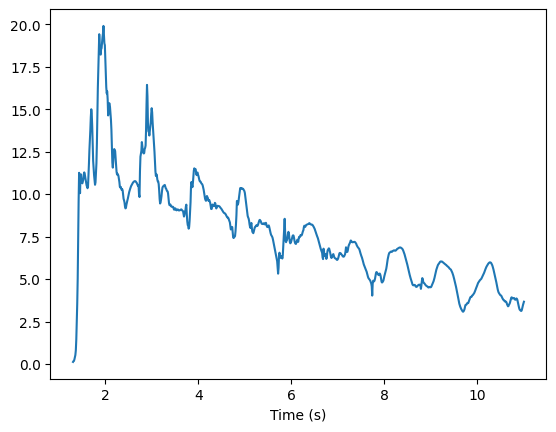

In [ ]:
data_filtered = data[(data.index > 1.3) & (data.index < 11)]
datatime_filtered = datatime[(datatime["Time (s)"] > 1.3) & (datatime["Time (s)"] < 11)]
data_filtered['Absolute acceleration (m/s^2)'].plot()


Predicted alpha: 20   Predicted beta: 0.1337


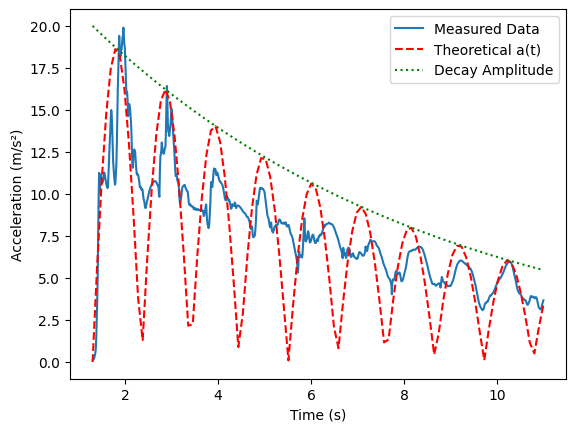

Fitted A: 11.1680, Fitted b: 0.0581


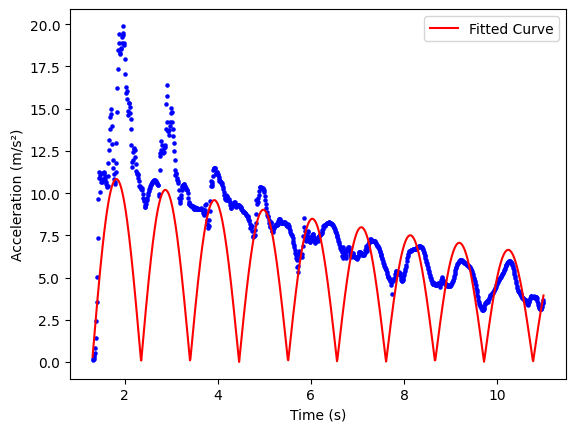

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Plot your existing filtered data
data_filtered = data[(data.index > 1.3) & (data.index < 11)]
ax = data_filtered['Absolute acceleration (m/s^2)'].plot(label="Measured Data")

# Generate t values matching the range
t = np.linspace(1.3, 11, 100)  # 100 points for smoothness

# Define your function
a_t = 20 * np.exp(-0.1337 * (t-1.3)) * abs(np.cos(0.95 * np.pi*(t-1.3) - np.pi/2))  # cos(2π) = 1, so it simplifies to 20 * exp(-0.1337 * t)
decay = 20 * np.exp(-0.1337 * (t-1.3))

print("Predicted alpha: 20   Predicted beta: 0.1337")

# Plot the function on the same axes
plt.plot(t, a_t, 'r--',  label="Theoretical a(t)")
plt.plot(t, decay, 'g:', label="Decay Amplitude")

# Add labels and legend
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m/s²)")
plt.legend()
plt.show()

def model(t, A, b):
    return A * np.exp(-b * (t-1.3)) * abs(np.cos(0.95 * np.pi*(t-1.3) - np.pi/2))

# Fit the model to the noisy data
popt, pcov = curve_fit(model,datatime["Time (s)"],data["Absolute acceleration (m/s^2)"] , p0=[20, 0.1337])  # Initial guess [A, b]

A_fit, b_fit = popt
print(f"Fitted A: {A_fit:.4f}, Fitted b: {b_fit:.4f}")


plt.scatter(datatime_filtered["Time (s)"], data_filtered["Absolute acceleration (m/s^2)"], color="blue", s=5)
plt.plot(datatime_filtered["Time (s)"], model(datatime_filtered["Time (s)"], *popt), 'r-', label="Fitted Curve")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m/s²)")
plt.legend()
plt.show()


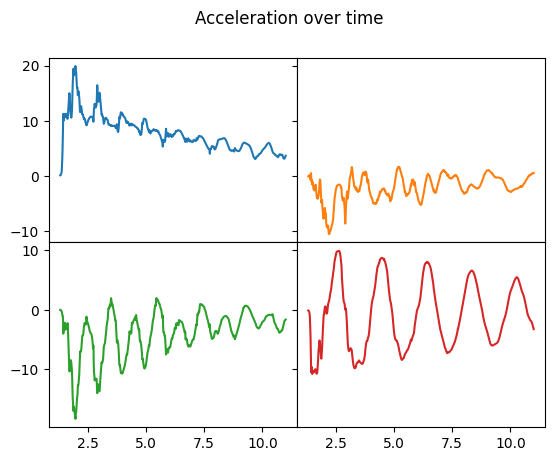

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Some example data to display
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)


fig = plt.figure()
gs = fig.add_gridspec(2, 2, hspace=0, wspace=0)
(ax1, ax2), (ax3, ax4) = gs.subplots(sharex='col', sharey='row')
fig.suptitle('Acceleration over')
ax1.plot(datatime_filtered["Time (s)"], data_filtered["Absolute acceleration (m/s^2)"])
ax2.plot(datatime_filtered["Time (s)"], data_filtered["Linear Acceleration x (m/s^2)"], 'tab:orange')
ax3.plot(datatime_filtered["Time (s)"], data_filtered["Linear Acceleration y (m/s^2)"], 'tab:green')
ax4.plot(datatime_filtered["Time (s)"], data_filtered["Linear Acceleration z (m/s^2)"], 'tab:red')

for ax in fig.get_axes():
    ax.label_outer()

In [ ]:
#The uncertainty of the acceleration may be from an imperfect experimental set up, the axis I chose for my phone to swing may have been inbetween two axis' of sensors and the phone might
#have had some rotational acceleration as well.
#Due to the accleration beign about 20m/s, using an approximation, mgh = (m/2)v^2 and a = (v^2)/r: gives the value of g to be about 10 m/s^2. This is very close to the correct answer of 9.81 m/s^2.